In [1]:
import pandas as pd
import matplotlib.pyplot as plt    # import matplotlib
import numpy as np                 # import numpy
import time                        # import time
import ipywidgets as widgets       # interactive display
from scipy.stats import pearsonr   # import pearson correlation

fig_w, fig_h = (6, 4)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})

In [2]:
def default_pars( **kwargs):
    pars = {}
    pars['sm']    = 0.005 #Source of non-specific local response
    pars['um']    = 0.002 #Decay rate for the non-specific local response
    
    pars['kpm']    =  0.6  #Rate at which the non-specific local response (M) eliminates pathogen
    pars['kmp']    = 0.01  # Rate at which the non-specific local response is exhausted by pathogen (P)
    
    pars['Pinf'] = 20 
    
    pars['kpn']    = 1.8 #Rate at which activated phagocytes (N*) consume pathogen
    pars['knp']    = 0.1 # Activation of resting phagocytes (NR) by pathogen
    pars['knn']    = 0.01 # Activation of resting phagocytes by previously activated phagocytes and their cytokines
    
    pars['snr']    = 0.08 #Source of resting phagocytes
    
    pars['unr']    = 0.12 #Decay rate of resting phagocytes    
    pars['un']    = 0.05 #Decay rate of activated phagocytes
    
    
#     pars['kpg']    = 0.062 #0.059
    ### simulation parameters ###
    pars['T'] = 3000. # Total duration of simulation [ms]
    pars['dt'] = .1  # Simulation time step [ms]

    ### external parameters if any ###
    for k in kwargs:
        pars[k] = kwargs[k]
    
    pars['range_t'] = np.arange(0, pars['T'], pars['dt']) # Vector of discretized time points [ms]
        
    return pars    

In [8]:
def bifurcation_p(pars,kpg_param):
    
        # Set parameters
    sm, um = pars['sm'],pars['um']
    kpm,kmp = pars['kpm'],pars['kmp']
    
#     kpg = pars['kpg']
    Pinf = pars['Pinf']
#     P_init = pars['P_init']   
    
    P_append=[]
    dp_append = []
    
    kpg=kpg_param
    P_init=0
    
    for i in range(0,20000):
#         kpg=0.1+kpg

        P =(P_init + i * 0.001)        
        M= sm / (um + kmp*P)  #For simplicity, they assumed that the local response reaches quasi-steady state
        dP = (kpg*P*(1-(P/Pinf)) - kpm * M *  P)  # Adding a logistic growth term
        
        P_append.append(P)
        dp_append.append(dP)
    return(P_append,dp_append)

20000

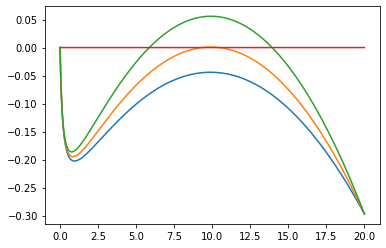

In [16]:
pars = default_pars()
kpg_param = 0.05
P_bif,dp_bif =bifurcation_p(pars,kpg_param)
plt.plot(P_bif,dp_bif)
kpg_param = 0.059
P_bif,dp_bif =bifurcation_p(pars,kpg_param)
plt.plot(P_bif,dp_bif)
kpg_param = 0.07
P_bif,dp_bif =bifurcation_p(pars,kpg_param)
plt.plot(P_bif,dp_bif)
dpdt = np.zeros(len(P_bif))
plt.plot(P_bif,dpdt)

In [17]:
def run_sepsis_model(pars,P_init_param,kpg_param):
    # Set parameters
    sm, um = pars['sm'],pars['um']
    kpm,kmp = pars['kpm'],pars['kmp']
    Pinf = pars['Pinf']
    kpg = kpg_param
    dt, range_t = pars['dt'], pars['range_t']
    Lt = range_t.size
    
    M = np.zeros(Lt) # non-specific local response levels
    P = np.zeros(Lt) # pathogen levels
    M[0]= 0  
    P[0]= P_init_param
    for it in range(Lt-1):
        
#         dM = (sm-um*M[it]-kmp * M[it] *  P[it] )* dt

        M[it]= sm / (um + kmp*P[it])  #For simplicity, they assumed that the local response reaches quasi-steady state
#         dP =  -kpm * M[it] *  P[it] * dt
#         dM = (sm-um*M[it]-kmp * M[it] *  P[it] )* dt
        dP = (kpg*P[it]*(1-(P[it]/Pinf)) - kpm * M[it] *  P[it]) * dt  # Adding a logistic growth term        
        #update
        P[it+1] = P[it] + dP
        M[it+1] = M[it] 
#         M[it+1] = M[it] + dM

    return M,P

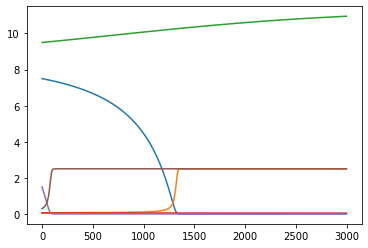

In [37]:
pars = default_pars()
M,P =run_sepsis_model(pars,7.5,0.06)
plt.plot(P[0:3000])
plt.plot(M[0:3000])
pars = default_pars()
M,P =run_sepsis_model(pars,9.5,0.06)
plt.plot(P[0:3000])
plt.plot(M[0:3000])
pars = default_pars()
M,P =run_sepsis_model(pars,1.5,0.06)
plt.plot(P[0:3000])
plt.plot(M[0:3000])

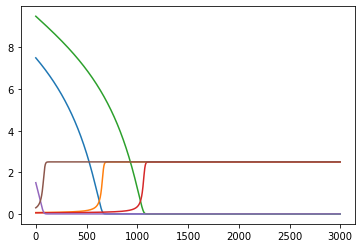

In [38]:
pars = default_pars()
M,P =run_sepsis_model(pars,7.5,0.05)
plt.plot(P[0:3000])
plt.plot(M[0:3000])
pars = default_pars()
M,P =run_sepsis_model(pars,9.5,0.05)
plt.plot(P[0:3000])
plt.plot(M[0:3000])
pars = default_pars()
pars = default_pars()
M,P =run_sepsis_model(pars,1.5,0.05)
plt.plot(P[0:3000])
plt.plot(M[0:3000])


In [35]:
pars = default_pars()
def kpg_value(pars):
    sm, um = pars['sm'],pars['um']
    kpm,kmp = pars['kpm'],pars['kmp']
    Pinf = pars['Pinf']
    
    kpg = (4* kmp*kpm*sm*Pinf)/np.power(Pinf*kmp + um,2)
    print(kpg)
kpg_value(pars)

0.05881776296441525
